<a href="https://colab.research.google.com/github/venukannur/machinelearningblr.github.io/blob/master/Venugopal_R_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Not an ideal network**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Convolution2D
from keras.utils import np_utils

from keras.datasets import mnist

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


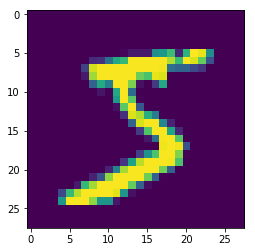

In [14]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [17]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [19]:
#Print categorical variable Y_train
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [20]:
#Receptive fields and input dimension of every layer is mentioned before it
#This cell adds sequentially many layers of convolution
#After first three layers a max pooling layer is added
#The max pooling layer is followed again by four layers of convolution steps
#The numbers of kernels at each convolution step is exponentially increasing (power of 2)
#The global receptive field at the final layer is the entire image
from keras.layers import Activation, MaxPooling2D
#Choosing sequential model which is a linear stacks of layers of kernels
model = Sequential() 
#input dimension (28X28X1)
#local receptive field (3X3X1) 
#global receptive field (3X3X1) 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
#input dimension (26X26X32)
#local receptive field (3X3X32) 
#global receptive field (5X5X1) 
model.add(Convolution2D(64, 3, 3, activation='relu'))
#input dimension (24X24X64)
#local receptive field (3X3X64) 
#global receptive field (7X7X1) 
model.add(Convolution2D(128, 3, 3, activation='relu'))


#input dimension (22X22X128)
#local receptive field (2X2X128) 
#global receptive field (8X8X1) 
model.add(MaxPooling2D(pool_size=(2, 2)))


#input dimension (11X11X128)
#local receptive field (3X3X128) 
#global receptive field (16X16X1) 
model.add(Convolution2D(256, 3, 3, activation='relu'))
#input dimension (9X9X256)
#local receptive field (3X3X256) 
#global receptive field (18X18X1) 
model.add(Convolution2D(512, 3, 3, activation='relu'))
#input dimension (7X7X512)
#local receptive field (3X3X512) 
#global receptive field (20X20X1) 
model.add(Convolution2D(1024, 3, 3, activation='relu'))
#input dimension (5X5X1024)
#local receptive field (3X3X1024) 
#global receptive field (22X22X1) 
model.add(Convolution2D(2048, 3, 3, activation='relu'))
#input dimension (3X3X2048)
#local receptive field (3X3X2048) 
#global receptive field (24X24X1) 
model.add(Convolution2D(10, 3, 3, activation='relu'))
#input dimension (1X1X10)
model.add(Flatten())
#input dimension (10)
model.add(Activation('softmax'))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 9, 9, 256)         295168    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 512)         1180160   
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 5, 5, 1024)        4719616   
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [22]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 120s 2ms/step - loss: 1.6702 - acc: 0.3930
Epoch 2/10
60000/60000 [==============================] - 114s 2ms/step - loss: 1.6247 - acc: 0.4040
Epoch 3/10
60000/60000 [==============================] - 114s 2ms/step - loss: 1.6062 - acc: 0.4082
Epoch 4/10
60000/60000 [==============================] - 114s 2ms/step - loss: 1.6083 - acc: 0.4071
Epoch 5/10
60000/60000 [==============================] - 113s 2ms/step - loss: 1.6028 - acc: 0.4087
Epoch 6/10
60000/60000 [==============================] - 114s 2ms/step - loss: 1.6002 - acc: 0.4087
Epoch 7/10
60000/60000 [==============================] - 113s 2ms/step - loss: 1.5980 - acc: 0.4091
Epoch 8/10
60000/60000 [==============================] - 113s 2ms/step - loss: 1.5984 - acc: 0.4093
Epoch 9/10
60000/60000 [==============================] - 113s 2ms/step - loss: 1.5992 - acc: 0.4088
Epoch 10/10
60000/60000 [==============================] - 113s 2ms/step - loss: 1.5963 - a

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [24]:
print(score)

[1.599480669403076, 0.4064]


In [0]:
y_pred = model.predict(X_test)

In [26]:
print(y_pred[:9])
print(y_test[:9])

[[9.5511275e-08 9.5511275e-08 9.5511275e-08 9.5511275e-08 9.5511275e-08
  9.5511275e-08 9.5511275e-08 9.9999905e-01 9.5511275e-08 9.5511275e-08]
 [1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01
  1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01]
 [1.0816179e-07 9.9999893e-01 1.0816179e-07 1.0816179e-07 1.0816179e-07
  1.0816179e-07 1.0816179e-07 1.0816179e-07 1.0816179e-07 1.0816179e-07]
 [1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01
  1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01]
 [6.6328517e-05 6.6328517e-05 6.6328517e-05 6.6328517e-05 9.9940312e-01
  6.6328517e-05 6.6328517e-05 6.6328517e-05 6.6328517e-05 6.6328517e-05]
 [4.3251100e-07 9.9999607e-01 4.3251100e-07 4.3251100e-07 4.3251100e-07
  4.3251100e-07 4.3251100e-07 4.3251100e-07 4.3251100e-07 4.3251100e-07]
 [1.0867667e-03 1.0867667e-03 1.0867667e-03 1.0867667e-03 9.9021906e-01
  1.0867667e-03 1.0867667e-03 1.0867667e-03 1.0867667e-03 

Issues with this NN
1. The layers are meant to capture features, textures, parts of objects and objects progressively in the different layers. The number of kernels added at each layer is much larger than that is required to handle MNIST dataset.

